In [39]:
import os

#collecting contracts name
dataset='smartbugs'
results_comp_path='../results/smartbugs/tool_patch_ability_COMP_per_contract.csv'

import pandas as pd
comp_df = pd.read_csv(results_gen_path)

In [40]:
tools = [
    #'Elysium', #bytecode
    'sGuard',  
    'sGuardPlus',
    'SmartFix', 
    #'SmartShield', #bytecde
    "SolGPT" ,
    'TIPS', 
]

In [41]:
comp_df

,Contract,Category,sGuard,sGuardPlus,SmartFix,SolGPT,TIPS,PatchCount
0,parity_wallet_bug_1.sol,access_control,NaN,NaN,NaN,NaN,NaN,0
1,timed_crowdsale.sol,time_manipulation,NaN,NaN,NaN,NaN,True,1
2,name_registrar.sol,other,NaN,NaN,NaN,True,True,2
3,blackjack.sol,bad_randomness,NaN,NaN,NaN,True,True,2
4,0x89c1b3807d4c67df034fffb62f3509561218d30b.sol,unchecked_low_level_calls,True,NaN,NaN,True,NaN,2
...,...,...,...,...,...,...,...,...
138,0x23a91059fdc9579a9fbd0edc5f2ea0bfdb70deb4.sol,reentrancy,True,True,True,True,True,5
139,0x5aa88d2901c68fda244f1d0584400368d2c8e739.sol,unchecked_low_level_calls,True,True,True,True,True,5
140,0x610495793564aed0f9c7fc48dc4c7c9151d34fd6.sol,unchecked_low_level_calls,True,True,True,True,True,5
141,0x941d225236464a25eb18076df7da6a91d0f95e9e.sol,reentrancy,True,True,True,True,True,5


### Using Venn Diagrams 
references: 
https://github.com/tctianchi/pyvenn

A prettier one : https://bioinformatics.psb.ugent.be/webtools/Venn/

In [42]:
#!pip install venn

### Using Venn 6 

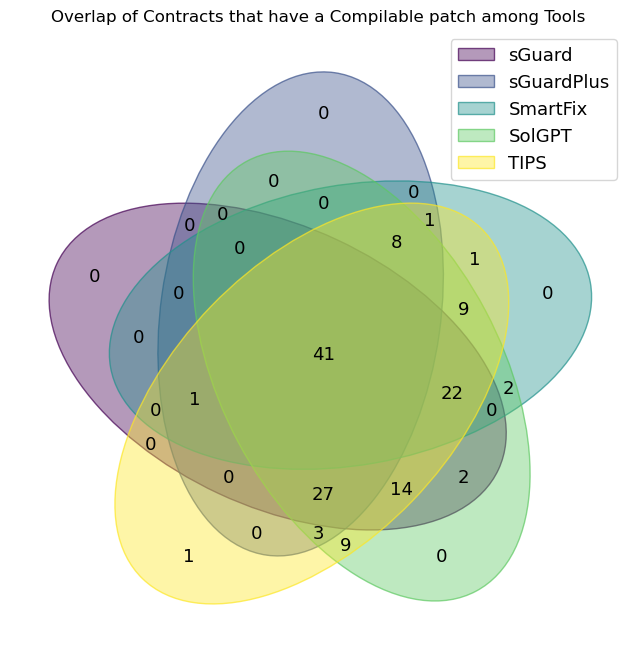

In [43]:
import pandas as pd
from venn import venn
import matplotlib.pyplot as plt

df=pd.read_csv(results_gen_path)

# Create a dictionary to hold the sets for each tool
tool_sets = {tool: set(df[df[tool] == True]['Contract']) for tool in tools}

# Prepare the data in a format suitable for the venn package
venn_data = {}
for tool, contracts in tool_sets.items():
    venn_data[tool] = contracts

# Create the Euler-like diagram using the venn package
venn(venn_data)
plt.title('Overlap of Contracts that have a Compilable patch among Tools')
plt.savefig("../results/smartbugs/COMP_overlap_venn_6.pdf") 

plt.show()

In [44]:
#venn_data["sGuardPlus"]

### Using UpSet WIP
references
https://gist.github.com/jnothman/0fc6daf3d9d75513dd3311e86e06cc8c


https://github.com/jnothman/UpSetPlot


In [45]:
#!pip install upsetplot

In [46]:
df=pd.read_csv(results_comp_path)
## Add column with no patches
df['No Patches']= df['PatchCount'] == 0

In [47]:
df

,Contract,Category,sGuard,sGuardPlus,SmartFix,SolGPT,TIPS,PatchCount,No Patches
0,parity_wallet_bug_1.sol,access_control,NaN,NaN,NaN,NaN,NaN,0,True
1,timed_crowdsale.sol,time_manipulation,NaN,NaN,NaN,NaN,True,1,False
2,name_registrar.sol,other,NaN,NaN,NaN,True,True,2,False
3,blackjack.sol,bad_randomness,NaN,NaN,NaN,True,True,2,False
4,0x89c1b3807d4c67df034fffb62f3509561218d30b.sol,unchecked_low_level_calls,True,NaN,NaN,True,NaN,2,False
...,...,...,...,...,...,...,...,...,...
138,0x23a91059fdc9579a9fbd0edc5f2ea0bfdb70deb4.sol,reentrancy,True,True,True,True,True,5,False
139,0x5aa88d2901c68fda244f1d0584400368d2c8e739.sol,unchecked_low_level_calls,True,True,True,True,True,5,False
140,0x610495793564aed0f9c7fc48dc4c7c9151d34fd6.sol,unchecked_low_level_calls,True,True,True,True,True,5,False
141,0x941d225236464a25eb18076df7da6a91d0f95e9e.sol,reentrancy,True,True,True,True,True,5,False


In [48]:
left_list=tools+['No Patches']
# Create a dictionary to hold the sets for each tool
tool_sets = {tool: set(df[df[tool] == True].apply(lambda x: (x['Contract'], x['Category']), axis=1)) for tool in left_list}

# Prepare the data in a format suitable for the venn package
data = {}
for tool, contract_set in tool_sets.items():
    data[tool] = {f"{contract}-{category}" for contract, category in contract_set}

/home/sofia/.local/lib/python3.10/site-packages/upsetplot/data.py:385: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
/home/sofia/.local/lib/python3.10/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)

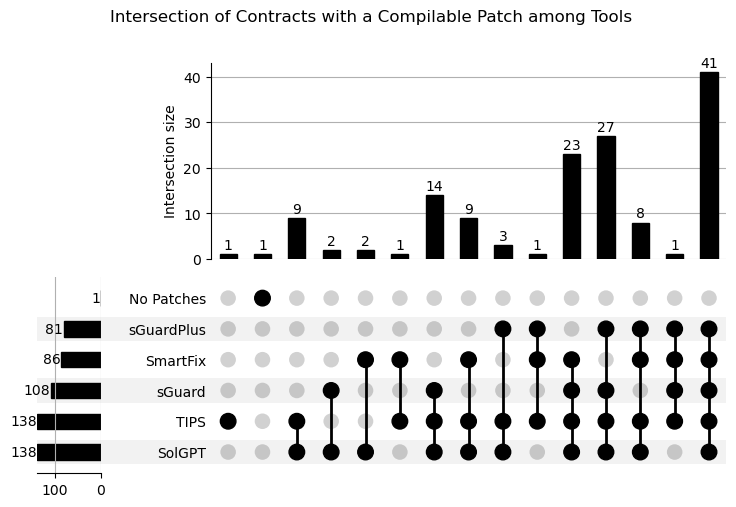

In [56]:
import matplotlib
from matplotlib import pyplot as plt

from upsetplot import from_contents, plot
plot(from_contents(data), show_counts="{:,}")
plt.suptitle("Intersection of Contracts with a Compilable Patch among Tools")
plt.savefig("../results/smartbugs/COMP_upsetplot_intersection.pdf")
plt.show()
